# Lead Score Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


### Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting Dataset

In [3]:
lead.shape

(9240, 37)

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Replacing 'Select' value with Nan in the Dataset
lead = lead.replace('Select',np.nan)

In [7]:
# Check and drop values with single unique numbers. 
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# Let us Drop unique valued columns
lead1= lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

## 1 Checking for Missing Values

In [9]:
round(100*(lead1.isnull().sum()/len(lead1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [10]:
#Fetching columns having null values more than 40%
null = lead1.isnull().sum()
null = null[null>= 0.4*len(lead1)]
len(null)

7

### 1.1 Dropping columns having missing values equal or more than 40%

In [11]:
null = list(null[null.values>=0.4].index)
lead1.drop(labels=null,axis=1,inplace=True)

In [12]:
lead1.shape

(9240, 25)

In [13]:
# Checking for null values in other columns
round(100*(lead1.isnull().sum()/len(lead1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### 1.2 Imputing columns having missing values less than 5% with mode values of the respective columns

In [14]:
lead1['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
testone                 1
WeLearn                 1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64

In [15]:
lead1['Lead Source'] = lead1['Lead Source'].fillna('Google')

In [16]:
lead1.TotalVisits.value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [17]:
lead1['TotalVisits'] = lead1['TotalVisits'].fillna(0.0)

In [18]:
lead1['Page Views Per Visit'].value_counts(dropna = False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.45       1
1.64       1
1.21       1
2.14       1
3.83       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [19]:
lead1['Page Views Per Visit'] = lead1['Page Views Per Visit'].fillna(0.00)

In [20]:
lead1['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [21]:
lead1['Last Activity'] = lead1['Last Activity'].fillna('Email Opened')

In [22]:
round(100*(lead1.isnull().sum()/len(lead1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [23]:
round(lead1['Country'].value_counts(normalize = True,dropna = False)*100,2)

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
France                   0.06
Oman                     0.06
unknown                  0.05
Canada                   0.04
South Africa             0.04
Kuwait                   0.04
Nigeria                  0.04
Germany                  0.04
Sweden                   0.03
Italy                    0.02
Asia/Pacific Region      0.02
Belgium                  0.02
Philippines              0.02
China                    0.02
Ghana                    0.02
Uganda                   0.02
Bangladesh               0.02
Netherlands              0.02
Kenya                    0.01
Sri Lanka                0.01
Vietnam                  0.01
Switzerland              0.01
Denmark   

In [24]:
# Checking other missing value columns
lead1['Country'] = lead1['Country'].fillna('Unknown')

In [25]:
def valslo(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Unknown":
        category = "Unknown"
    else:
        category = "Outside India"
    return category

lead1['Country'] = lead1.apply(lambda x:valslo(x['Country']), axis = 1)
lead1['Country'].value_counts()

India            6492
Unknown          2461
Outside India     287
Name: Country, dtype: int64

In [26]:
round(100*(lead1['Specialization'].value_counts(normalize = True,dropna = False)),2)

NaN                                  36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

In [27]:
# Since the count of Nan is higher than all other values we will replace Nan with new category 'Not Specified'
lead1['Specialization'] = lead1['Specialization'].replace(np.NaN,'Unknown')

In [28]:
#Checking 'What is your current occupation' column
round(100*lead1['What is your current occupation'].value_counts(normalize = True,dropna=False),2)

Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

In [29]:
#imputing Nan values with mode "Unemployed"

lead1['What is your current occupation'] = lead1['What is your current occupation'].replace(np.nan, 'Unknown')

In [30]:
#checking value counts

round(100*lead1['What matters most to you in choosing a course'].value_counts(normalize = True, dropna=False),2)

Better Career Prospects      70.65
NaN                          29.32
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

In [31]:
#replacing Nan values with Mode "Better Career Prospects"

lead1['What matters most to you in choosing a course'] = lead1['What matters most to you in choosing a course'].replace(np.nan,"Unknown")

In [32]:
#checking value counts of Tag variable
round(100*lead1['Tags'].value_counts(normalize = True,dropna=False),2)

NaN                                                  36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

In [33]:
#replacing Nan values with "Not Specified"
lead1['Tags'] = lead1['Tags'].replace(np.nan,'Unknown')

In [34]:
#checking value counts of "City" column

round(100*lead1['City'].value_counts(normalize = True,dropna=False),2)

NaN                            39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

In [35]:
lead1['City'] = lead1['City'].replace(np.nan,'Unknown')

In [36]:
round(100*(lead1.isnull().sum()/len(lead1)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [37]:
# Code for checking number of rows left in percent
round(100*(lead1.shape[0])/(lead.shape[0]),2)

100.0

In [38]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [39]:
# Removing Id values since they are unique for everyone
lead2 = lead1.drop(['Prospect ID','Lead Number'],1)
lead2.shape

(9240, 23)

## 2 EDA

### 2.1 Univariate Analysis


### 2.1.1 Categorical Variables

In [40]:
def count(data,title,size,x):
    plt.figure(figsize = size)
    sns.countplot(data)
    plt.title(title)
    plt.xticks(rotation = x)
    plt.show()

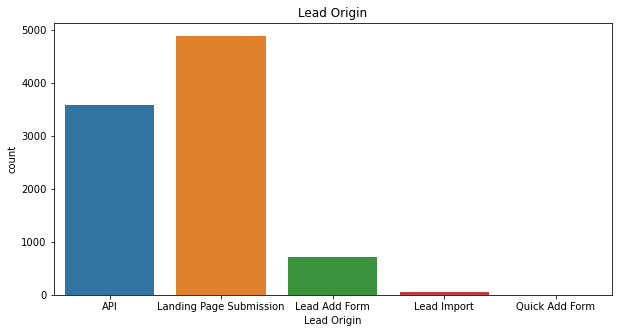

In [41]:
count(lead2['Lead Origin'],'Lead Origin',(10,5),0)

- inference 1 = Landing Page Submission has highest count followed by API.

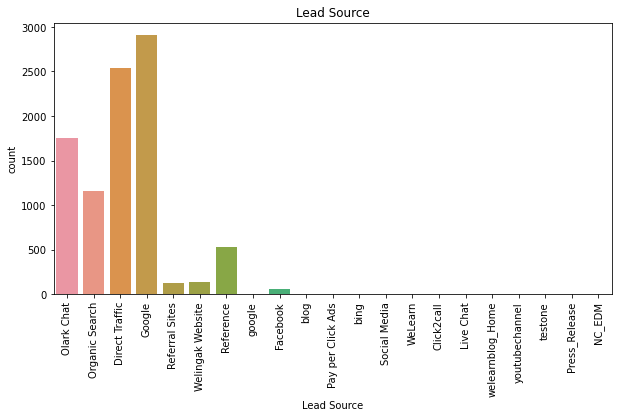

In [42]:
count(lead2['Lead Source'],'Lead Source',(10,5),90)

- inference 1 = Most of the people came via Google followed by Direct Traffic source.

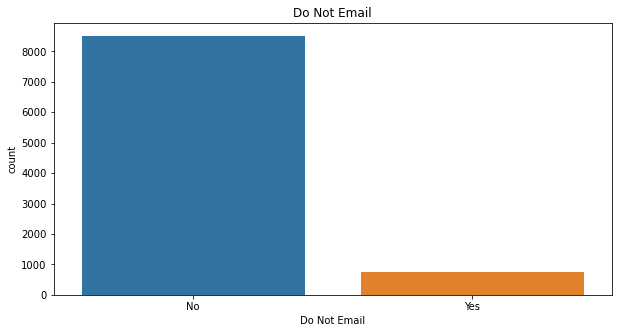

In [43]:
count(lead2['Do Not Email'],'Do Not Email',(10,5),0)

- inference 1 = Most of the people have choose 'Don't Email' option from this dataset.

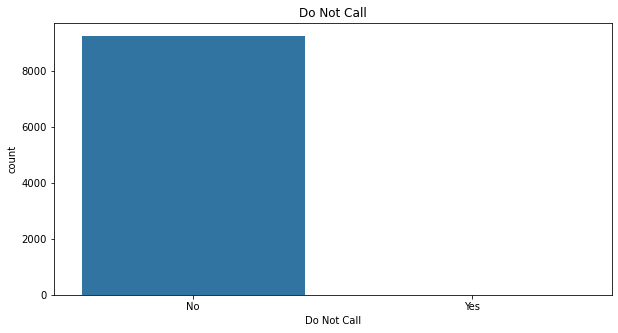

In [44]:
count(lead2['Do Not Call'],'Do Not Call',(10,5),0)

- inference 1 = Most of the people have choose 'Don't Call' option from this dataset.

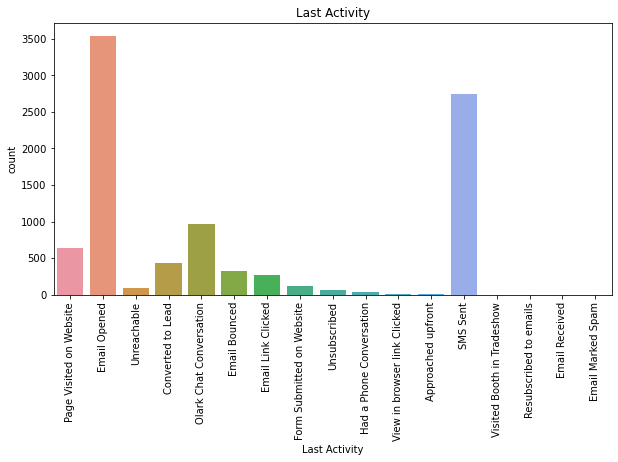

In [45]:
count(lead2['Last Activity'],'Last Activity',(10,5),90)

- inference 1 = Majority of people have atleast opened the email or read the sms sent.

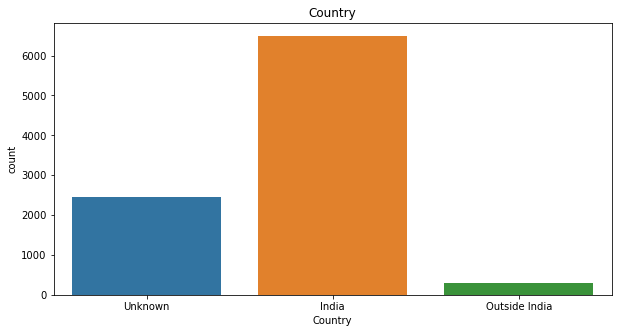

In [46]:
count(lead2['Country'],'Country',(10,5),0)

- inference 1 = Most of the people are from India

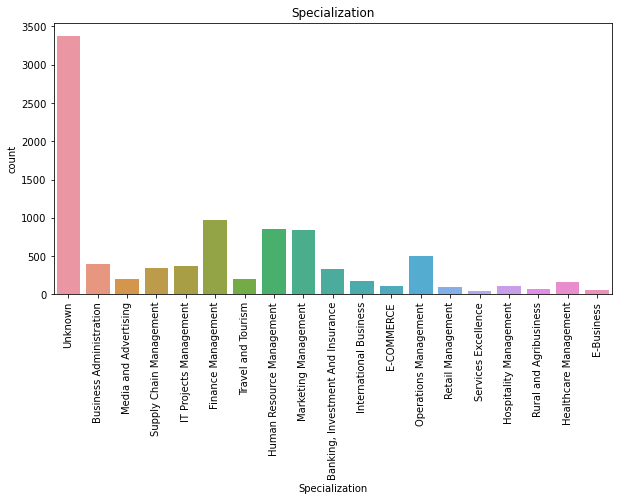

In [47]:
count(lead2['Specialization'],'Specialization',(10,5),90)

- inference 1 = People having management profession in any genre are more likely to be a lead.
- inference 2 = Most of the people didn't mentioned their specialization.

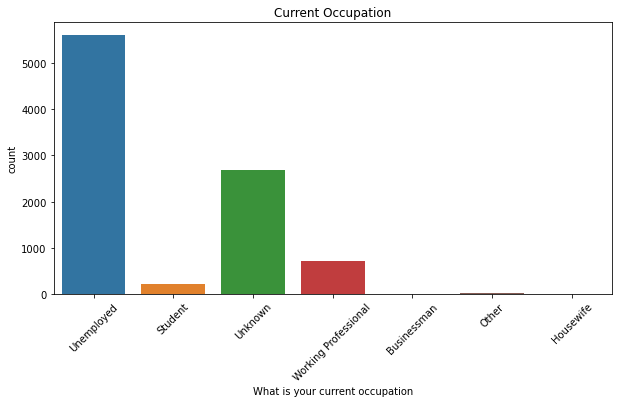

In [48]:
count(lead2['What is your current occupation'],'Current Occupation',(10,5),45)

- inference 1 = Most of the people are unemployed.

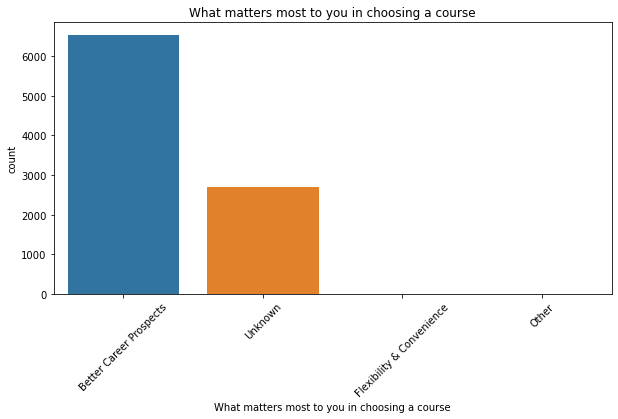

In [49]:
count(lead2['What matters most to you in choosing a course'],'What matters most to you in choosing a course',(10,5),45)

- inference 1 = Most of the people wants Better Career Prospects from the chosen course.

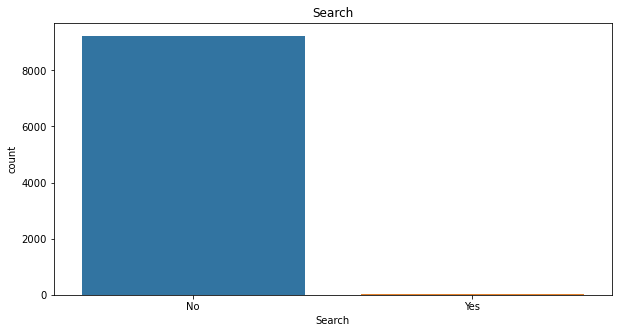

In [50]:
count(lead2['Search'],'Search',(10,5),0)

- inference 1 = Majority of people haven't searched about any of the ads.

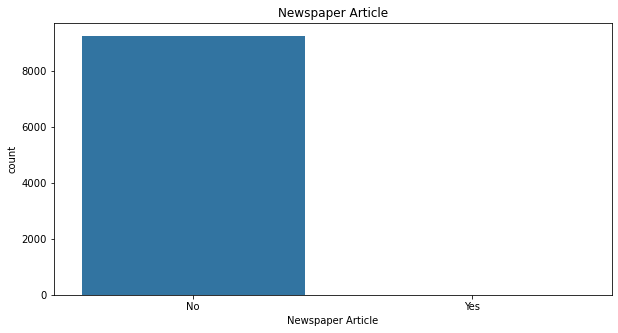

In [51]:
count(lead2['Newspaper Article'],'Newspaper Article',(10,5),0)

- inference 1 = Majority of people haven't seen any ads regarding course in Newspaper Article

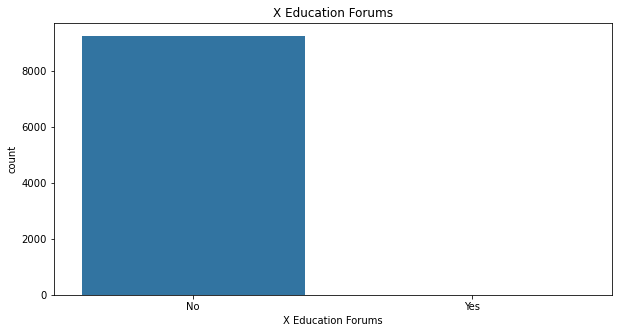

In [52]:
count(lead2['X Education Forums'],'X Education Forums',(10,5),0)

- inference 1 = Majority of the people haven't seen any of the ads regarding course on X Education Forum.

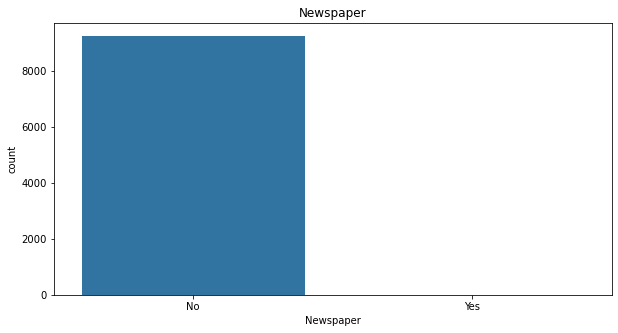

In [53]:
count(lead2['Newspaper'],'Newspaper',(10,5),0)

- inference 1 = Majority of people haven't seen ads in newspaper regarding course from X Education.

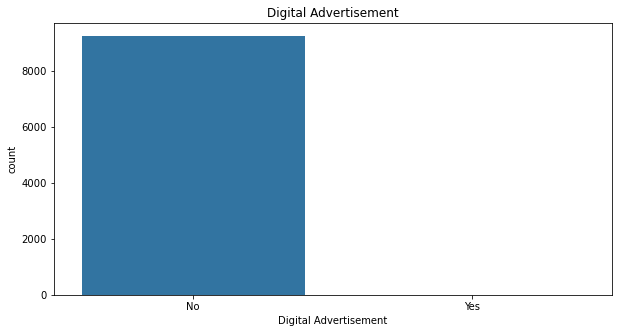

In [54]:
count(lead2['Digital Advertisement'],'Digital Advertisement',(10,5),0)

- inference 1 = Majority of people haven't seen ads on Digital Advertisement regarding course from X Education.

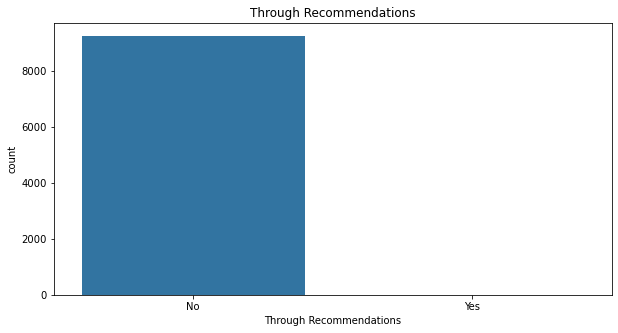

In [55]:
count(lead2['Through Recommendations'],'Through Recommendations',(10,5),0)

- inference 1 = Majority of people haven't seen ads through recommendations regarding course from X Education.

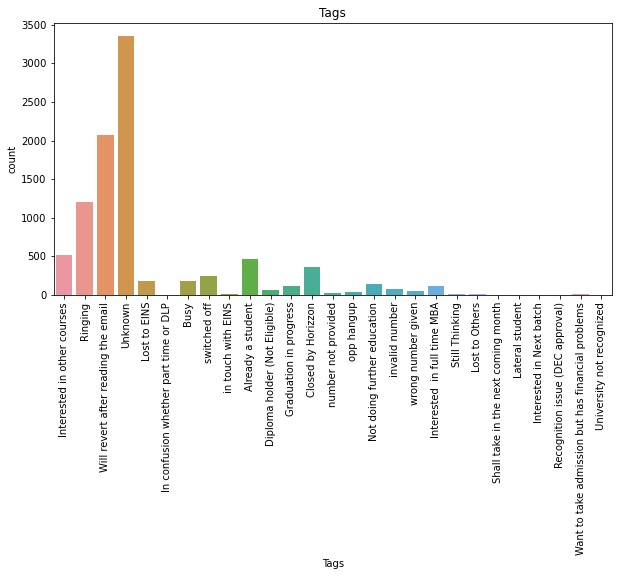

In [56]:
count(lead2['Tags'],'Tags',(10,5),90)

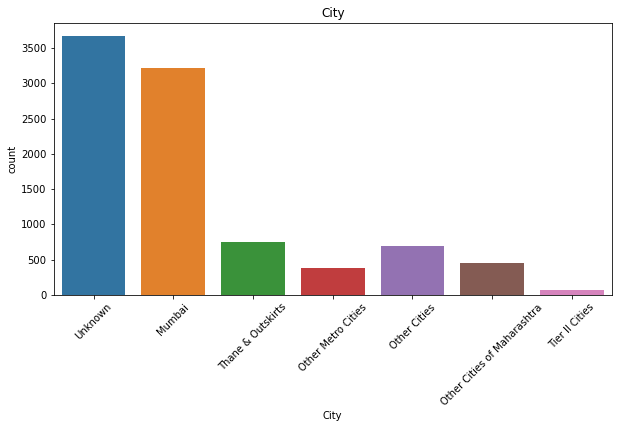

In [57]:
count(lead2['City'],'City',(10,5),45)

- inference 1 = People from Mumbai are majority in number.

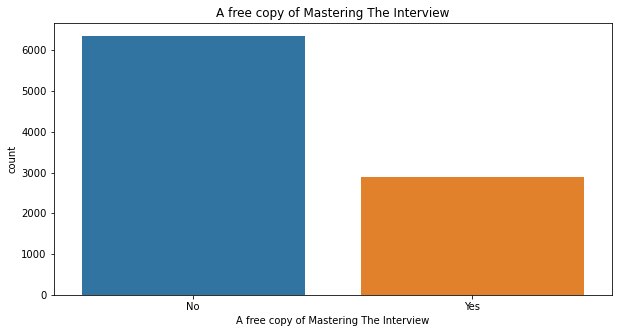

In [58]:
count(lead2['A free copy of Mastering The Interview'],'A free copy of Mastering The Interview',(10,5),0)

- inference 1 = Most of the People wanted a free copy of Mastering the Interview from X educstion.

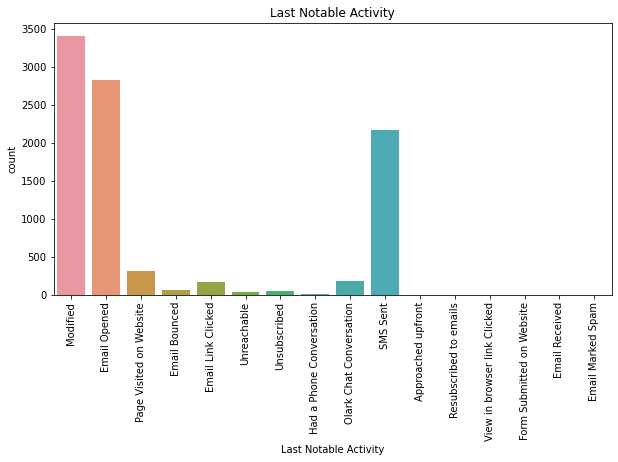

In [59]:
count(lead2['Last Notable Activity'],'Last Notable Activity',(10,5),90)

- inference 1 = Counts of activities like Modified, Email Opened and Sms Sent are high compared to other activities.

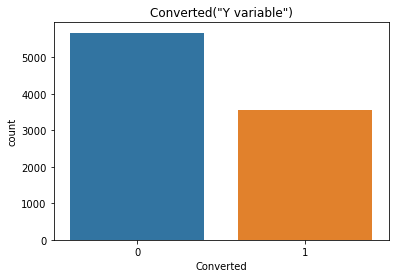

In [60]:
sns.countplot(lead2['Converted'])
plt.title('Converted("Y variable")')
plt.show()

- inference 1 = Around 5700 people who visited X education site haven't join any course whereas around 3500 people have got converted to leads by joining any course from X education.

### 2.1.2 Numerical Variables

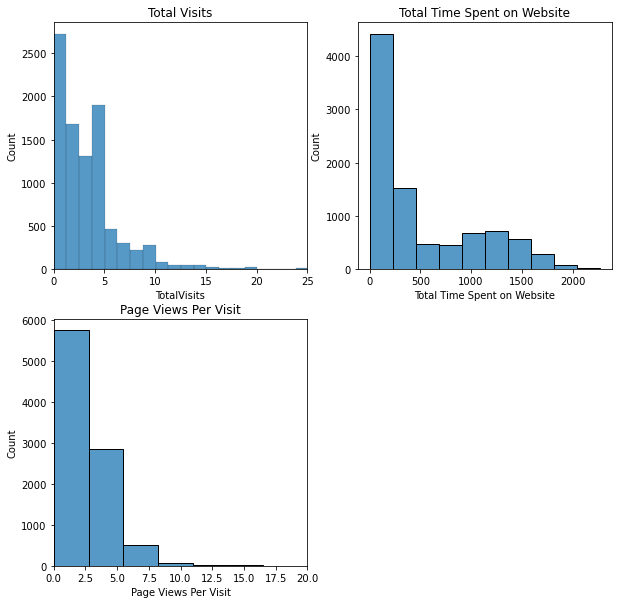

In [61]:
plt.figure(figsize = (10,10))

plt.subplot(221)
sns.histplot(lead2['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
sns.histplot(lead2['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.histplot(lead2['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()

### 2.2 Relating all the categorical variables to Converted


In [62]:
lead2.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

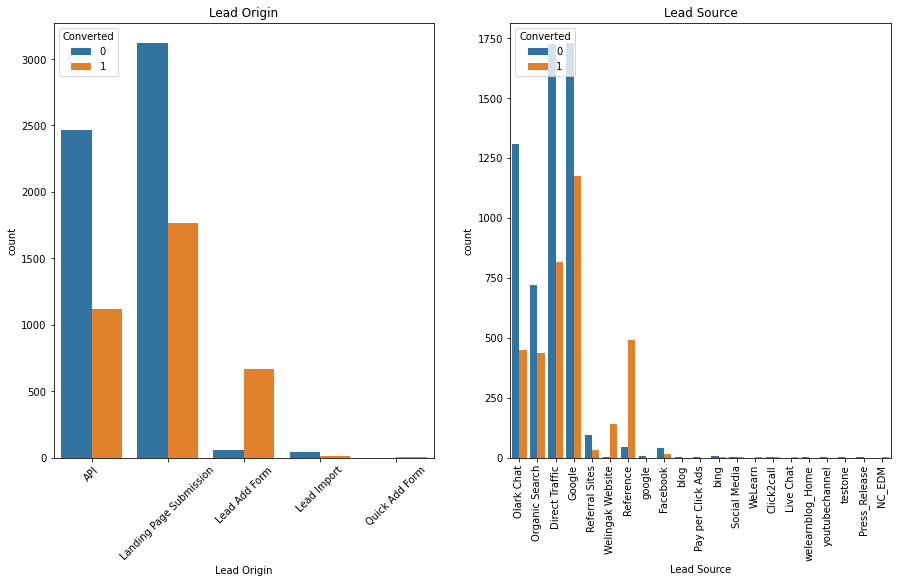

In [63]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead2).tick_params(axis='x', rotation = 45)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

- inference 1 = Added form is more effective way to convert people but it is significantly less in count.
- inference 2 = Landing Page Submission has highest count of people who did'nt convert. Still it is second best effective way to convert people.
- inference 3 = Reference helps most in converting people followed by Google.
- inference 4 = Olark chat and refferal sites perform lowest in conversion of people.

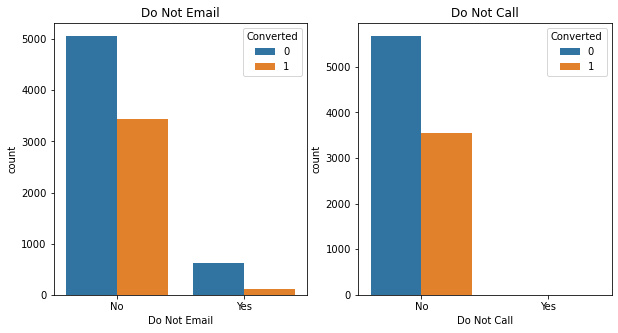

In [64]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Do Not Call')
plt.show()


- inference 1 = People who optioned out for no email and no call are having high chances of getting converted to join any course.

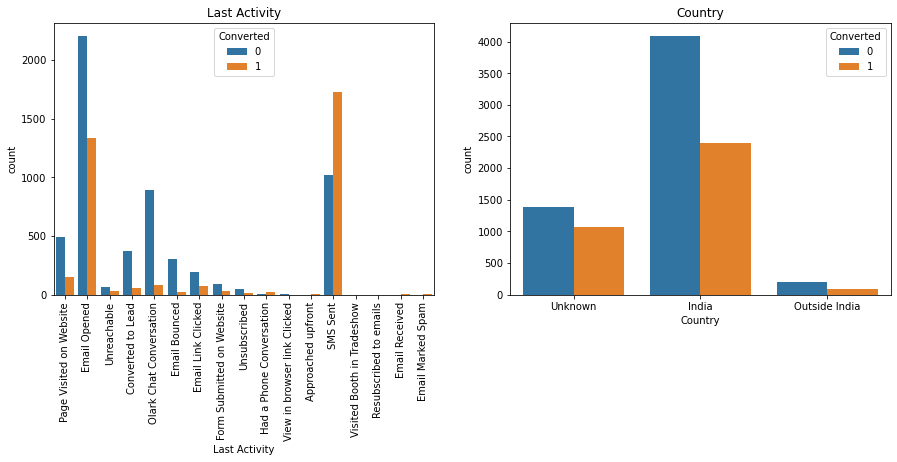

In [65]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Country')
plt.show()

- inference 1 = Sms sending have very good response from people which relfects in the conversion count.
- inference 2 = Email opened activity has less but good reponse from people in conversion count.
- inference 3 = Indian people are showing positive response in conversion count compared to out of India countries.

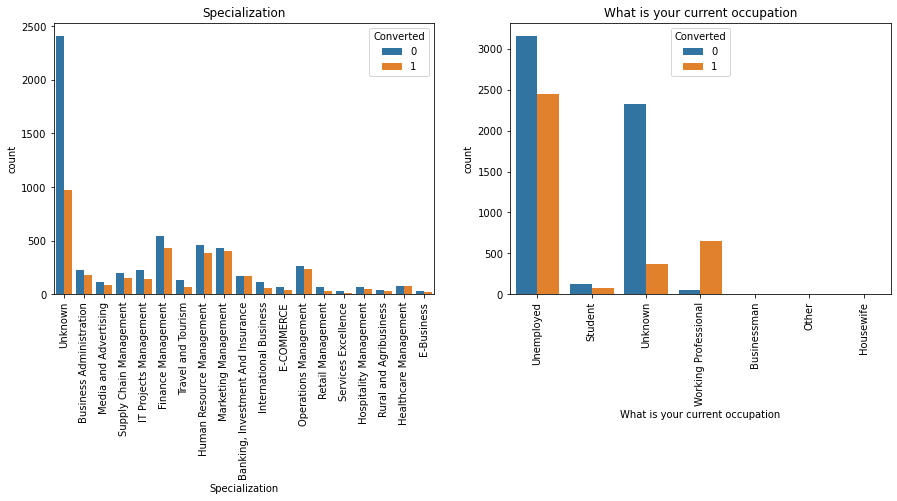

In [66]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()


- inference 1 = Management professions like Finance, HR, Marketing and Operations have very good count of conversion compared to other specializations.
- inference 2 = Working profession shows excellent count of conversion whereas unemployed people have higher count for being converted.

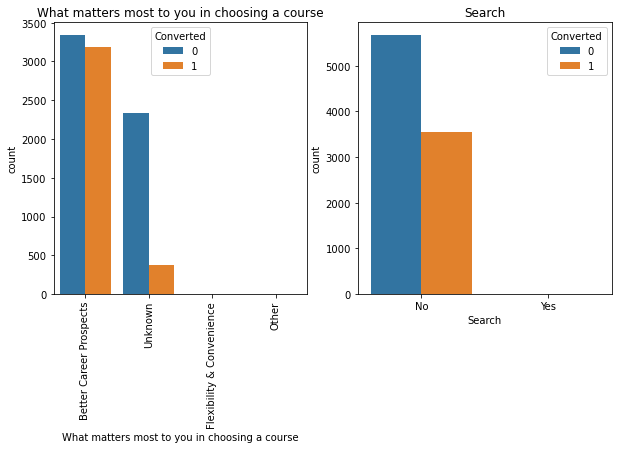

In [67]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Search')
plt.show()

- inference 1 = People asking for Better Career Prospects shows highly positive response in conversion.
- inference 2 = People who didn't search about X Education courses are having good chances for conversion.

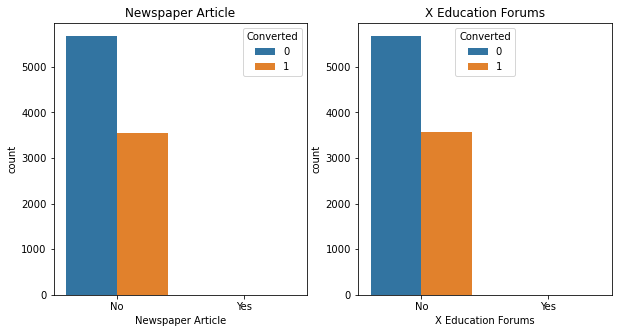

In [68]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('X Education Forums')
plt.show()

- inference 1 = People who haven't seen ads on Newspaper Articles and X Education Forum has good conversion rate but still lower than non conversion rate.

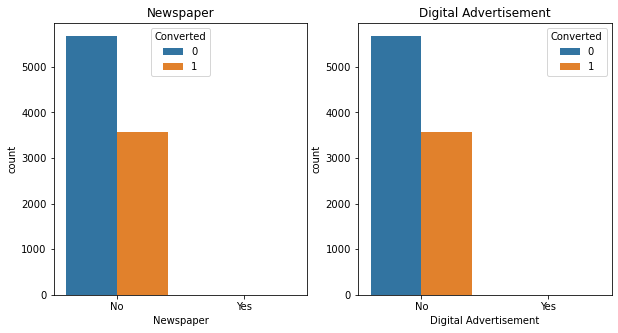

In [69]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Digital Advertisement')
plt.show()

- inference 1 = People who haven't seen ads in Newspaper and Digital Advertisement has good conversion rate but still lower than non conversion rate.

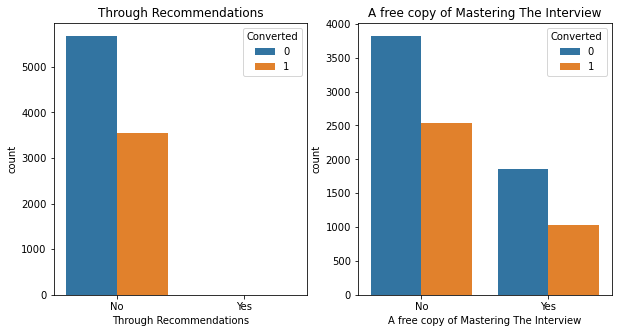

In [70]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('A free copy of Mastering The Interview')
plt.show()

- inference 1 = People who haven't seen any ads through Recommendation as well as didn't demand for a free copy of Mastering the Interview have good count of conversion above 2400.

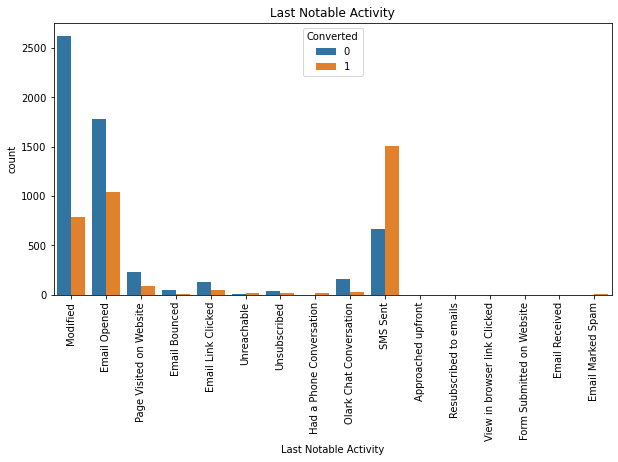

In [71]:
plt.figure(figsize = (10,5))
sns.countplot(x='Last Notable Activity', hue='Converted', data = lead2).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

- inference 1 = Sms Sent have highest conversion count compared to other activities followed by Email Opened.

### 2.3 Multi Variate Analysis

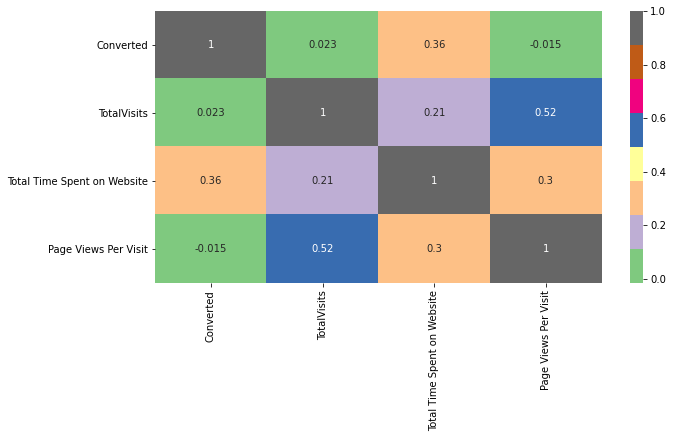

In [72]:
# To check the correlation among variables
plt.figure(figsize=(10,5))
sns.heatmap(lead2.corr(),cmap = "Accent", annot = True)
plt.show()

- inference 1 = There is 0.36 correlation of "Total Time Spent on Website" with target variable "Converted".
- inference 2 = "Page Views Per Visit" have -0.015 correlation with target variable.

In [73]:
numeric = lead2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787
std,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


## 3 Dummy Variables

In [74]:
lead2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [75]:
lead2.loc[:, lead2.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [76]:
# Create dummy variables use the 'get_dummies' funct
dummy = pd.get_dummies(lead2[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataset
dataset_final_dummy = pd.concat([lead2, dummy], axis=1)
dataset_final_dummy

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Unknown,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Outside India,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0


In [77]:
pd.set_option('display.max_rows', None)
a = pd.DataFrame(dataset_final_dummy.columns)
a

,0
0,Lead Origin
1,Lead Source
2,Do Not Email
3,Do Not Call
4,Converted
5,TotalVisits
6,Total Time Spent on Website
7,Page Views Per Visit
8,Last Activity
9,Country


In [78]:
dataset_final_dummy = dataset_final_dummy.drop(['Tags','City','What is your current occupation_Unknown','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_Unknown','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)


In [79]:
dataset_final_dummy.shape

(9240, 83)

## 4. Test-Train Split


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = dataset_final_dummy.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
# Put the target variable in y
y = dataset_final_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [83]:
# Split the dataset as 70% | 30% for train and test. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3112,0.007968,0.182867,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8413,0.019920,0.679538,0.208333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2961,0.011952,0.553928,0.041667,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0.023904,0.504660,0.062500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2740,0.011952,0.445184,0.125000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


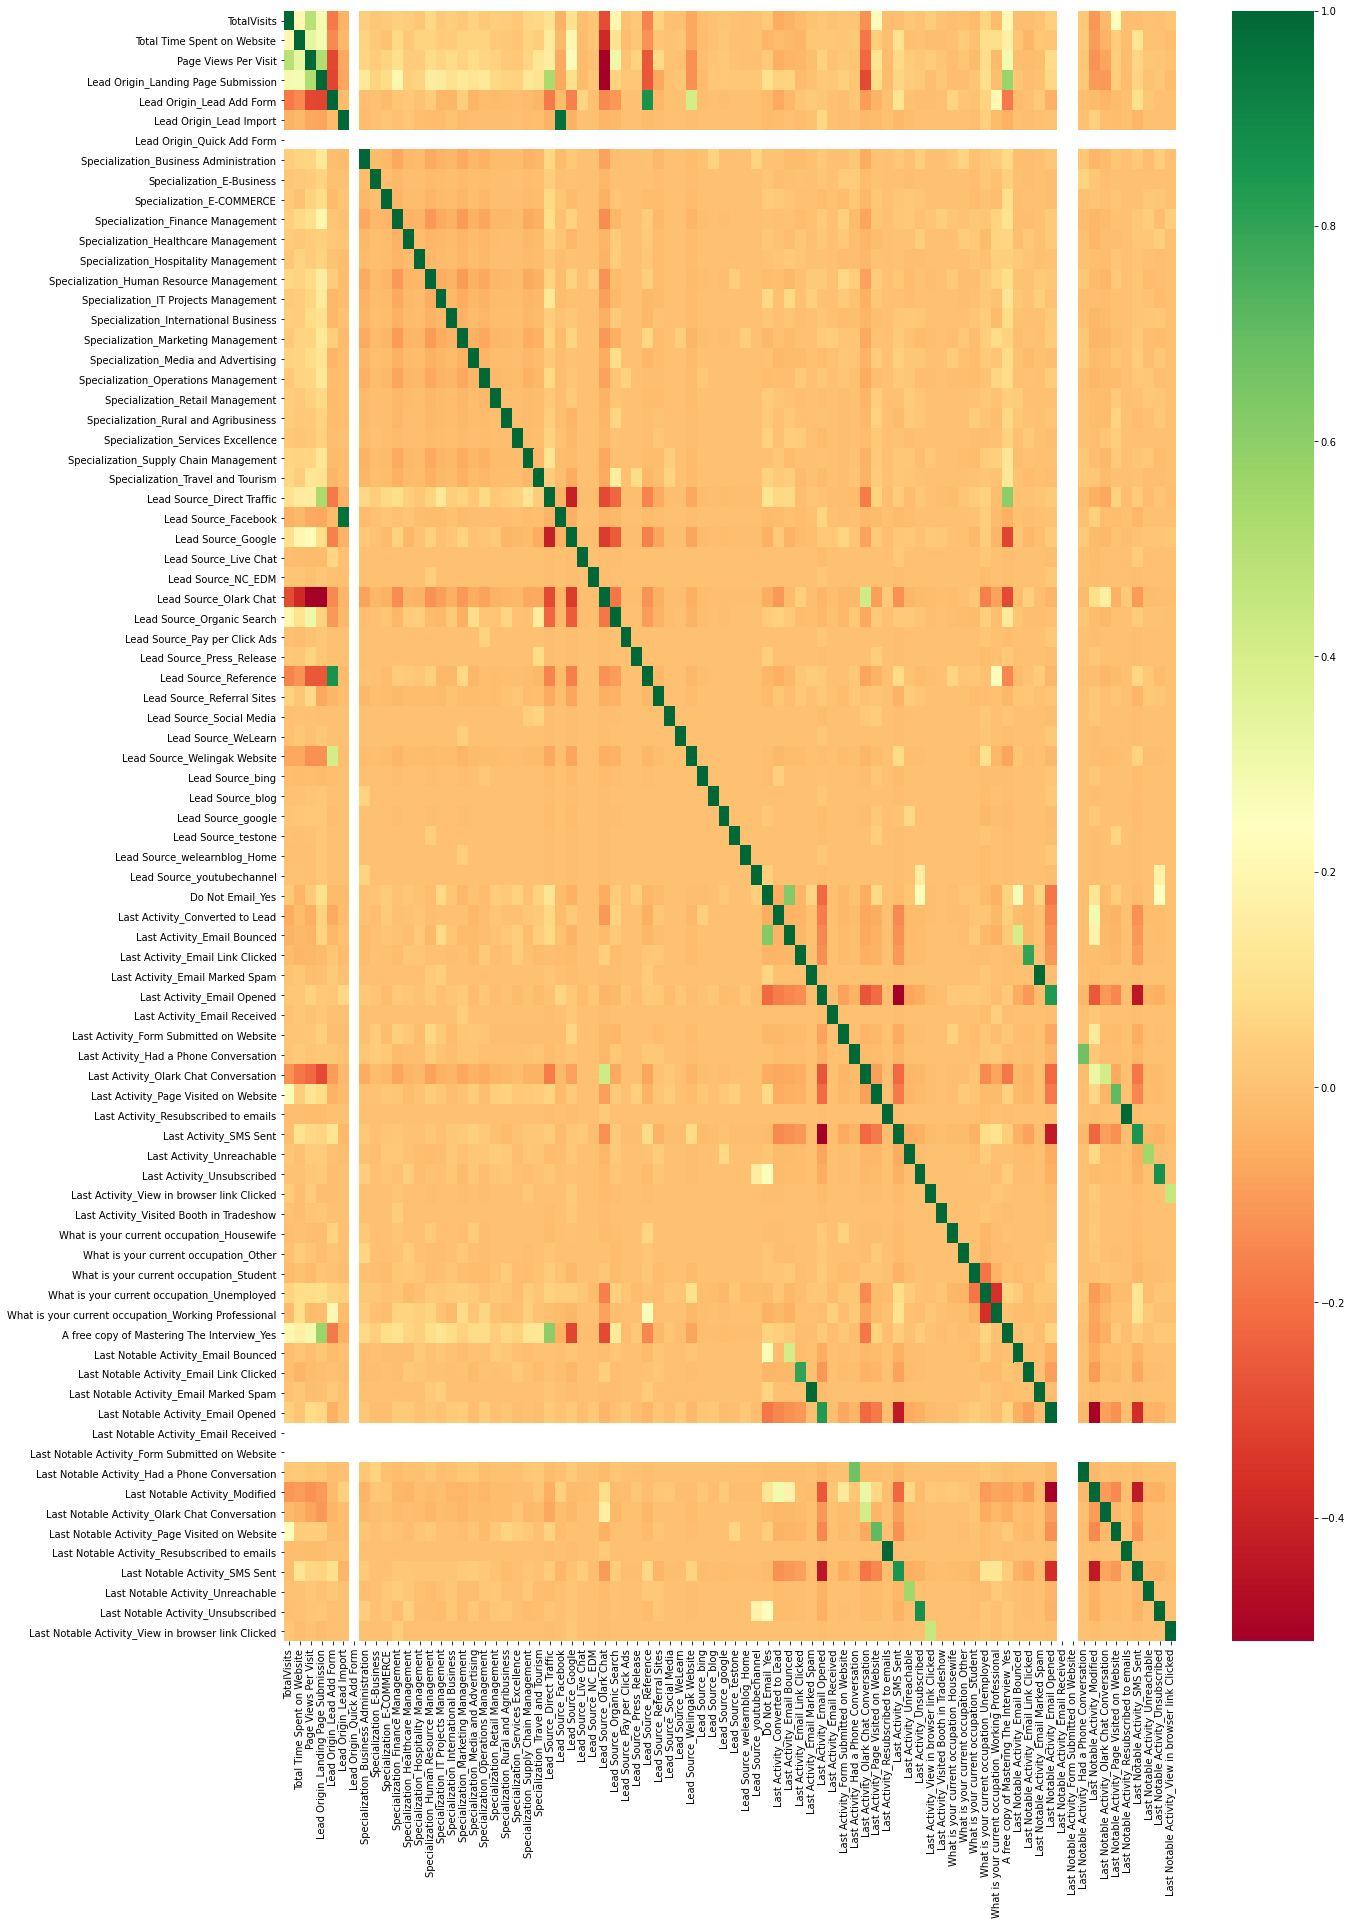

In [85]:
# Check for correlation among variables
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr(),cmap = 'RdYlGn')
plt.show()

In [86]:
#top 10 Correlation for X_train
correlation_0_target = X_train.corr()
correlation_0_target = correlation_0_target.where(np.triu(np.ones(correlation_0_target.shape), k=1).astype(np.bool))
correlation_0_target = correlation_0_target.unstack().reset_index().dropna(subset = [0])
correlation_0_target.columns = ['VAR1', 'VAR2', 'Correlation_Value']
correlation_0_target['Corr_abs'] = abs(correlation_0_target['Correlation_Value'])
correlation_0_target.sort_values(by = "Corr_abs", ascending =False, inplace = True)
correlation_0_target.head(10)


,VAR1,VAR2,Correlation_Value,Corr_abs
5706,Last Notable Activity_Email Marked Spam,Last Activity_Email Marked Spam,1.000000,1.000000
6369,Last Notable Activity_Resubscribed to emails,Last Activity_Resubscribed to emails,1.000000,1.000000
2055,Lead Source_Facebook,Lead Origin_Lead Import,0.972067,0.972067
6618,Last Notable Activity_Unsubscribed,Last Activity_Unsubscribed,0.868863,0.868863
2710,Lead Source_Reference,Lead Origin_Lead Add Form,0.858239,0.858239
6452,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.856511,0.856511
5789,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.837172,0.837172
5623,Last Notable Activity_Email Link Clicked,Last Activity_Email Link Clicked,0.801010,0.801010
6286,Last Notable Activity_Page Visited on Website,Last Activity_Page Visited on Website,0.704623,0.704623
6038,Last Notable Activity_Had a Phone Conversation,Last Activity_Had a Phone Conversation,0.670249,0.670249


## 5. Model Building


In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [88]:
from sklearn.feature_selection import RFE

In [89]:
# Try Run RFE with Variables =15
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)


In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 65),
 ('Lead Origin_Quick Add Form', False, 66),
 ('Specialization_Business Administration', False, 33),
 ('Specialization_E-Business', False, 23),
 ('Specialization_E-COMMERCE', False, 31),
 ('Specialization_Finance Management', False, 28),
 ('Specialization_Healthcare Management', False, 16),
 ('Specialization_Hospitality Management', False, 44),
 ('Specialization_Human Resource Management', False, 26),
 ('Specialization_IT Projects Management', False, 27),
 ('Specialization_International Business', False, 38),
 ('Specialization_Marketing Management', False, 24),
 ('Specialization_Media and Advertising', False, 39),
 ('Specialization_Operations Management', False, 29),
 ('Specialization_Retail Management', False, 55),
 ('Specialization_Rural and Agrib

In [91]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [92]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Cha

In [93]:
# Select columns selected by RFE
X_train = X_train[col]

In [94]:
import statsmodels.api as sm

In [95]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.4
Date:                Mon, 14 Jun 2021   Deviance:                       5280.8
Time:                        22:44:31   Pearson chi2:                 6.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5545      0.113    -31.351      0.000      -3.777      -3.332
TotalVisits                                              6.6305      2.085      3.181      0.001       2.545      10.716
Total Time Spent on Website                              4.5740      0.166     27.636      0.000       4.250       4.898
Lead Origin_Lead Add Form                                3.6711      0.200     18.341      0.000       3.279       4.063
Lead Source_Olark Chat                                   1.4595      0.111     13.185      0.000       1.243       1.676
Lead Source_Welingak Website                             2.4362      1.029      2.368      0.018       0.420       4.452
Do Not Email_Yes                                        -1.5141      0.166     -9.104      0.000      -1.840      -1.188
Last Activity_Olark Chat Conversation                   -1.1451      0.159     -7.199      0.000      -1.457      -0.833
Last Activity_SMS Sent                                   1.3702      0.075     18.350      0.000       1.224       1.517
What is your current occupation_Housewife               23.4678   1.89e+04      0.001      0.999    -3.7e+04    3.71e+04
What is your current occupation_Student                  1.3992      0.220      6.356      0.000       0.968       1.831
What is your current occupation_Unemployed               1.2665      0.087     14.500      0.000       1.095       1.438
What is your current occupation_Working Professional     3.7686      0.195     19.330      0.000       3.386       4.151
Last Notable Activity_Had a Phone Conversation           3.2532      1.171      2.778      0.005       0.958       5.549
Last Notable Activity_Resubscribed to emails            24.6611   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Notable Activity_Unreachable                        2.6577      0.688      3.861      0.000       1.309       4.007
========================================================================================================================
"""

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.20
1,Total Time Spent on Website,1.91
2,Lead Origin_Lead Add Form,1.52
3,Lead Source_Olark Chat,1.50
0,TotalVisits,1.48
7,Last Activity_SMS Sent,1.48
6,Last Activity_Olark Chat Conversation,1.38
11,What is your current occupation_Working Profes...,1.33
4,Lead Source_Welingak Website,1.24
5,Do Not Email_Yes,1.06


Drop Last Notable Activity_Resubscribed to emails as the p value was high.


In [98]:
X_train.drop('Last Notable Activity_Resubscribed to emails', axis = 1, inplace = True)

In [99]:
# Refit the model with the new set
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.6
Date:                Mon, 14 Jun 2021   Deviance:                       5285.2
Time:                        22:44:32   Pearson chi2:                 6.82e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5491      0.113    -31.343      0.000      -3.771      -3.327
TotalVisits                                              6.6209      2.084      3.177      0.001       2.537      10.705
Total Time Spent on Website                              4.5723      0.165     27.634      0.000       4.248       4.897
Lead Origin_Lead Add Form                                3.6711      0.200     18.342      0.000       3.279       4.063
Lead Source_Olark Chat                                   1.4644      0.111     13.238      0.000       1.248       1.681
Lead Source_Welingak Website                             2.4364      1.029      2.368      0.018       0.420       4.453
Do Not Email_Yes                                        -1.5144      0.166     -9.109      0.000      -1.840      -1.189
Last Activity_Olark Chat Conversation                   -1.1500      0.159     -7.232      0.000      -1.462      -0.838
Last Activity_SMS Sent                                   1.3682      0.075     18.332      0.000       1.222       1.514
What is your current occupation_Housewife               22.4629   1.15e+04      0.002      0.998   -2.24e+04    2.25e+04
What is your current occupation_Student                  1.3938      0.220      6.334      0.000       0.962       1.825
What is your current occupation_Unemployed               1.2618      0.087     14.466      0.000       1.091       1.433
What is your current occupation_Working Professional     3.7638      0.195     19.312      0.000       3.382       4.146
Last Notable Activity_Had a Phone Conversation           3.2514      1.171      2.777      0.005       0.957       5.546
Last Notable Activity_Unreachable                        2.6550      0.688      3.858      0.000       1.306       4.004
========================================================================================================================
"""

In [100]:
# Make a VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.20
1,Total Time Spent on Website,1.91
2,Lead Origin_Lead Add Form,1.52
3,Lead Source_Olark Chat,1.50
0,TotalVisits,1.48
7,Last Activity_SMS Sent,1.48
6,Last Activity_Olark Chat Conversation,1.38
11,What is your current occupation_Working Profes...,1.33
4,Lead Source_Welingak Website,1.24
5,Do Not Email_Yes,1.06


In [101]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [102]:
# Refit the model with the new set
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.1
Date:                Mon, 14 Jun 2021   Deviance:                       5296.3
Time:                        22:44:32   Pearson chi2:                 6.85e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5269      0.113    -31.331      0.000      -3.748      -3.306
TotalVisits                                              6.5682      2.080      3.158      0.002       2.492      10.644
Total Time Spent on Website                              4.5695      0.165     27.646      0.000       4.246       4.893
Lead Origin_Lead Add Form                                3.7065      0.200     18.522      0.000       3.314       4.099
Lead Source_Olark Chat                                   1.4577      0.110     13.198      0.000       1.241       1.674
Lead Source_Welingak Website                             2.4006      1.029      2.334      0.020       0.384       4.417
Do Not Email_Yes                                        -1.5195      0.166     -9.135      0.000      -1.846      -1.194
Last Activity_Olark Chat Conversation                   -1.1542      0.159     -7.263      0.000      -1.466      -0.843
Last Activity_SMS Sent                                   1.3621      0.075     18.269      0.000       1.216       1.508
What is your current occupation_Student                  1.3743      0.220      6.248      0.000       0.943       1.805
What is your current occupation_Unemployed               1.2433      0.087     14.341      0.000       1.073       1.413
What is your current occupation_Working Professional     3.7443      0.195     19.236      0.000       3.363       4.126
Last Notable Activity_Had a Phone Conversation           3.2432      1.169      2.774      0.006       0.952       5.535
Last Notable Activity_Unreachable                        2.6455      0.688      3.847      0.000       1.298       3.993
========================================================================================================================
"""

In [103]:
# Make a VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.20
1,Total Time Spent on Website,1.91
2,Lead Origin_Lead Add Form,1.51
3,Lead Source_Olark Chat,1.50
0,TotalVisits,1.48
7,Last Activity_SMS Sent,1.48
6,Last Activity_Olark Chat Conversation,1.38
10,What is your current occupation_Working Profes...,1.33
4,Lead Source_Welingak Website,1.24
5,Do Not Email_Yes,1.06


In [104]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [105]:
# Refit the model with the new set
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.0
Date:                Mon, 14 Jun 2021   Deviance:                       5307.9
Time:                        22:44:32   Pearson chi2:                 6.85e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5190      0.112    -31.292      0.000      -3.739      -3.299
TotalVisits                                              6.7083      2.087      3.214      0.001       2.618      10.799
Total Time Spent on Website                              4.5638      0.165     27.656      0.000       4.240       4.887
Lead Origin_Lead Add Form                                3.7006      0.200     18.496      0.000       3.308       4.093
Lead Source_Olark Chat                                   1.4524      0.110     13.158      0.000       1.236       1.669
Lead Source_Welingak Website                             2.4010      1.029      2.334      0.020       0.385       4.417
Do Not Email_Yes                                        -1.5240      0.166     -9.168      0.000      -1.850      -1.198
Last Activity_Olark Chat Conversation                   -1.1594      0.159     -7.297      0.000      -1.471      -0.848
Last Activity_SMS Sent                                   1.3537      0.074     18.182      0.000       1.208       1.500
What is your current occupation_Student                  1.3698      0.220      6.231      0.000       0.939       1.801
What is your current occupation_Unemployed               1.2450      0.087     14.371      0.000       1.075       1.415
What is your current occupation_Working Professional     3.7398      0.195     19.223      0.000       3.358       4.121
Last Notable Activity_Unreachable                        2.6364      0.688      3.834      0.000       1.289       3.984
========================================================================================================================
"""

In [106]:
# Make a VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.19
1,Total Time Spent on Website,1.91
2,Lead Origin_Lead Add Form,1.51
3,Lead Source_Olark Chat,1.50
0,TotalVisits,1.48
7,Last Activity_SMS Sent,1.48
6,Last Activity_Olark Chat Conversation,1.38
10,What is your current occupation_Working Profes...,1.33
4,Lead Source_Welingak Website,1.24
5,Do Not Email_Yes,1.06


## 6. Creating Prediction


In [107]:
# Predict the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3112    0.200041
8413    0.910078
2961    0.984626
24      0.547228
2740    0.459553
489     0.121200
9116    0.629952
4176    0.234863
8537    0.668523
6267    0.134317
dtype: float64

In [108]:
# Reshape to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20004084, 0.91007786, 0.98462568, 0.54722766, 0.45955291,
       0.12120006, 0.62995219, 0.23486272, 0.66852335, 0.13431747])

In [109]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.200041
1,1,0.910078
2,1,0.984626
3,1,0.547228
4,0,0.459553


In [110]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.200041,0
1,1,0.910078,1
2,1,0.984626,1
3,1,0.547228,1
4,0,0.459553,0


## 7. Model Evaluation


In [111]:
from sklearn import metrics

In [112]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3498,  456],
       [ 745, 1769]], dtype=int64)

In [113]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [114]:
# Checking for the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8143166357452072

In [115]:
#  value of true positive - TP
TP = confusion[1,1]
# value of true negatives - TN
TN = confusion[0,0]
#  value of false positives - FP
FP = confusion[0,1] 
# value of false negatives - FN
FN = confusion[1,0]

In [116]:
# Calculating the sensitivity
TP/(TP+FN)

0.7036595067621321

In [117]:
# Calculating the specificity
TN/(TN+FP)

0.8846737481031867

### 7.1 PLOTTING ROC CURVE

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'], drop_intermediate = False )

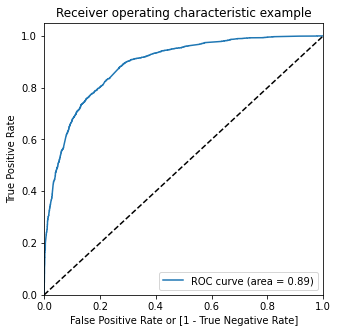

In [120]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])

The ROC Curve should be a value close to 1. We are getting a good value of 0.89 indicating a good predictive model.

### 7.2 Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:


In [121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.200041,0,1,1,1,0,0,0,0,0,0,0
1,1,0.910078,1,1,1,1,1,1,1,1,1,1,1
2,1,0.984626,1,1,1,1,1,1,1,1,1,1,1
3,1,0.547228,1,1,1,1,1,1,1,0,0,0,0
4,0,0.459553,0,1,1,1,1,1,0,0,0,0,0


In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388683  1.000000  0.000000
0.1   0.1  0.583333  0.987271  0.326505
0.2   0.2  0.762832  0.913683  0.666920
0.3   0.3  0.787415  0.874304  0.732170
0.4   0.4  0.810297  0.771679  0.834851
0.5   0.5  0.814317  0.703660  0.884674
0.6   0.6  0.804886  0.631663  0.915023
0.7   0.7  0.780148  0.519491  0.945878
0.8   0.8  0.758503  0.429992  0.967375
0.9   0.9  0.714595  0.284407  0.988113


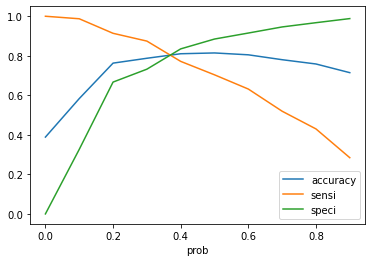

In [123]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [124]:
# From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.200041,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.910078,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.984626,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.547228,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.459553,0,1,1,1,1,1,0,0,0,0,0,1


In [125]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Conversion_Prob','final_Predicted','Lead_Score']].head()

,Converted,Conversion_Prob,final_Predicted,Lead_Score
0,0,0.200041,0,20
1,1,0.910078,1,91
2,1,0.984626,1,98
3,1,0.547228,1,55
4,0,0.459553,1,46


In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8102968460111317

In [127]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3301,  653],
       [ 574, 1940]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.771678599840891

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.8348507840161862

###### Observation of Train Set
- Cutoff = 0.4
- Accuracy = 81.03%
- Sensitivity = 77.17%
- Specificity = 83.49%

## 8 Prediction on Test set

In [131]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [132]:
# Substituting all the columns in the final train model
col = X_train.columns

In [133]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm.shape

(2772, 13)

In [134]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.183226
1,0,0.715698
2,0,0.629159
3,0,0.146586
4,0,0.310326


In [135]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.183226,0
1,0,0.715698,1
2,0,0.629159,1
3,0,0.146586,0
4,0,0.310326,0


In [136]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8084415584415584

In [137]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1400,  325],
       [ 206,  841]], dtype=int64)

In [138]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [139]:
# Calculating the sensitivity
TP/(TP+FN)

0.8032473734479465

In [140]:
# Calculating the specificity
TN/(TN+FP)

0.8115942028985508

## 9.1 Precision-Recall

In [141]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3498,  456],
       [ 745, 1769]], dtype=int64)

In [142]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7950561797752809

In [143]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7036595067621321

## 9.2 Precision and Recall tradeoff

In [144]:
from sklearn.metrics import precision_recall_curve

In [145]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
 5       1
 6       1
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      1
 22      0
 23      0
 24      1
 25      0
 26      1
 27      0
 28      0
 29      0
 30      0
 31      1
 32      0
 33      1
 34      0
 35      0
 36      1
 37      1
 38      0
 39      1
 40      0
 41      0
 42      1
 43      0
 44      1
 45      0
 46      1
 47      1
 48      0
 49      0
 50      0
 51      1
 52      1
 53      1
 54      0
 55      0
 56      0
 57      1
 58      0
 59      1
 60      0
 61      0
 62      0
 63      0
 64      1
 65      1
 66      0
 67      0
 68      0
 69      0
 70      1
 71      0
 72      0
 73      0
 74      1
 75      0
 76      0
 77      0
 78      1
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      1
 87      0
 88      0
 89      1
 90      1

In [146]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

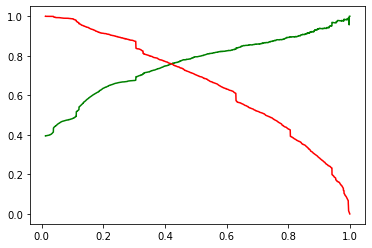

In [147]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score,final_predicted
0,0,0.200041,0,1,1,1,0,0,0,0,0,0,0,0,20,0
1,1,0.910078,1,1,1,1,1,1,1,1,1,1,1,1,91,1
2,1,0.984626,1,1,1,1,1,1,1,1,1,1,1,1,98,1
3,1,0.547228,1,1,1,1,1,1,1,0,0,0,0,1,55,1
4,0,0.459553,0,1,1,1,1,1,0,0,0,0,0,1,46,1


In [149]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8109152752009895

In [150]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3321,  633],
       [ 590, 1924]], dtype=int64)

In [151]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [152]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7524442706296441

In [153]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7653142402545744

## 10 Prediction on Test Set Again

In [154]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.183226
1,0,0.715698
2,0,0.629159
3,0,0.146586
4,0,0.310326


In [155]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.183226,0
1,0,0.715698,1
2,0,0.629159,1
3,0,0.146586,0
4,0,0.310326,0


In [156]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8102453102453102

In [157]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1447,  278],
       [ 248,  799]], dtype=int64)

In [158]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [159]:
# Calculating the sensitivity
TP/(TP+FN)

0.7631327602674307

In [160]:
# Calculating the specificity
TN/(TN+FP)

0.8388405797101449

In [161]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7418755803156918

In [162]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7631327602674307

#### After running the model on the Test Data these are the figures we obtain:
- Accuracy = 81.10%
- Sensitivity = 77.08%
- Specificity = 83.54%

### Final Observation

#### Train Set:
- Accuracy = 81.03%
- Sensitivity = 77.17%
- Specificity = 83.49%

#### Test Set:
- Accuracy = 81.02%
- Sensitivity = 76.31%
- Specificity = 83.88%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model